In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

First, just read in data.

In [2]:
raw_data = pd.read_csv("heightWeightData.txt", header=None, names=["gender", "height", "weight"])
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
gender    210 non-null int64
height    210 non-null int64
weight    210 non-null int64
dtypes: int64(3)
memory usage: 5.0 KB


,gender,height,weight
0,1,67,125
1,2,68,140
2,2,67,142
3,2,60,110
4,2,64,97


We're told that for gender, 1 is male, and 2 is female. Part (a) says to extract the height/weight data corresponding to the males. Then, we fit a 2d Gaussian to the male data, using the empirical mean and covariance. Then, we'll plot this data.

Let's extract the males first.

In [3]:
male_data = raw_data[raw_data.gender == 1]
male_data.head()

,gender,height,weight
0,1,67,125
6,1,79,210
8,1,71,150
11,1,71,175
12,1,72,145


Next, we'll calculate the empirical mean and covariance.

In [4]:
mu_male = male_data.mean(axis=0)[1:].as_matrix() # remove gender
male_mean_diff = male_data.iloc[:,1:].as_matrix() - mu_male
covariance_male = np.dot(male_mean_diff.T, male_mean_diff)/len(male_data)
print(mu_male)
print(covariance_male)

[  71.65753425  175.61643836]
[[    9.6498405     46.93713642]
 [   46.93713642  1035.277538  ]]


Let's plot the data now.

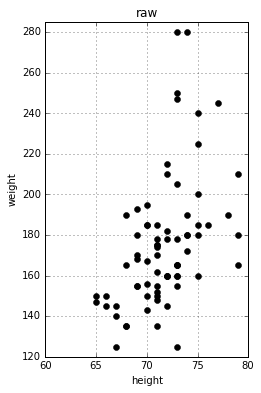

In [5]:
plt.figure(figsize=(6,6))
plt.plot(male_data.height, male_data.weight, 'ko')
plt.axis([60,80,120,285])
plt.title('raw')
plt.xlabel('height')
plt.ylabel('weight')
plt.axes().set_aspect(0.2)
plt.grid(True)
plt.show()

Let $\mathbf{x} \sim \mathcal{N}\left(\boldsymbol\mu, \Sigma\right)$, where $\mathbf{x} \in \mathbb{R}^p$. We can write $\Sigma = SDS^\intercal$ by the spectral theorem, where the columns of $S$ are orthonormal eigenvectors, and $D$ is a diagonal matrix of eigenvectors, $\lambda_1, \lambda_2,\ldots,\lambda_n$.

$\mathbf{x}$ has probability mass function,
\begin{equation}
f(\mathbf{x}) = \frac{1}{(2\pi)^{p/2}\sqrt{\det{\Sigma}}}\exp\left(-\frac{1}{2}\left(\mathbf{x}-\boldsymbol\mu\right)^\intercal\Sigma^{-1}\left(\mathbf{x}-\boldsymbol\mu\right)\right).
\end{equation}

Note that $S^\intercal S = I$, and $S^{-1} = S^\intercal$. This implies that 
\begin{equation}
\Sigma^{-1} = \left(SDS^\intercal\right)^{-1} = \left(S^\intercal\right)^{-1}D^{-1}S^{-1} = SD^{-1}S^\intercal.
\end{equation}

Let $\mathbf{y} = S^\intercal\left(\mathbf{x}-\boldsymbol\mu\right)$.

Then, we have that 
\begin{align}
\left(\mathbf{x}-\boldsymbol\mu\right)^\intercal\Sigma^{-1}\left(\mathbf{x}-\boldsymbol\mu\right)
&= \left(\mathbf{x}-\boldsymbol\mu\right)^\intercal S D^{-1} S^\intercal\left(\mathbf{x}-\boldsymbol\mu\right) \\
&= \left(S^\intercal\left(\mathbf{x}-\boldsymbol\mu\right)\right)^\intercal  D^{-1} S^\intercal\left(\mathbf{x}-\boldsymbol\mu\right) \\
&= \mathbf{y}^\intercal D^{-1} \mathbf{y}.
\end{align}
Moreover, $\mathbf{x} = S\mathbf{y} + \boldsymbol\mu$, so $D\mathbf{x}(\mathbf{y}) = S$, and so $\det D\mathbf{x}(\mathbf{y}) = 1$. Changing variables, the probability density function for $\mathbf{y}$ is
\begin{equation}
f(\mathbf{y}) = \frac{1}{(2\pi)^{p/2}\sqrt{\det  D}}\exp\left(-\frac{1}{2}\mathbf{y}^\intercal D^{-1} \mathbf{y}\right)
= \frac{1}{(2\pi)^{p/2}\sqrt{\prod_{j=1}^p\lambda_j}}\exp\left(-\frac{1}{2}\sum_{j=1}^p \frac{y_j^2}{\lambda_j}\right) = \prod_{j=1}^p\frac{1}{\sqrt{2\pi\lambda_j}}\exp\left(-\frac{1}{2}\frac{y_j^2}{\lambda_j}\right).
\end{equation}
Thus, $\mathbf{y} \sim \mathcal{N}\left(\mathbf{0}, D\right)$, and the coordinates of $\mathbf{y}$ are independent, with $y_i \mathcal{N}\left(0, \lambda_j\right)$. Now, the level curves of $f$ correspond to the hyperellipsoids
\begin{equation}
\sum_{j=1}^p \frac{y_j^2}{\lambda_j} = \sum_{j=1}^p \left(\frac{y_j}{\sqrt{\lambda_j}}\right)^2 = c.
\end{equation}

$\frac{y_j}{\sqrt{\lambda_j}} \sim \mathcal{N}(0, 1)$, so $\sum_{j=1}^p \frac{y_j^2}{\lambda_j} \sim \chi^2_p$, and so a $95\%$ confidence region would be
\begin{equation}
\sum_{j=1}^p \frac{y_j^2}{\lambda_j} \leq F_{\chi^2_p}^{-1}(0.95), 
\end{equation}
where $F$ is the cumulative distribution function. For our $p = 2$ case, $F_{\chi^2_p}^{-1}(0.95) \approx 5.991.$ Now $\mathbf{y}$ our coordinates with respect to a orthonormal eigenbasis. Since $\mathbf{x} = S\mathbf{y} + \boldsymbol\mu$, the confidence region is a rotated hyperellipsoid centered at $\boldsymbol\mu$ with semi-axes along the eigenvectors of $\Sigma$. Let's plot this hyperellipsoid along with the indexed data.

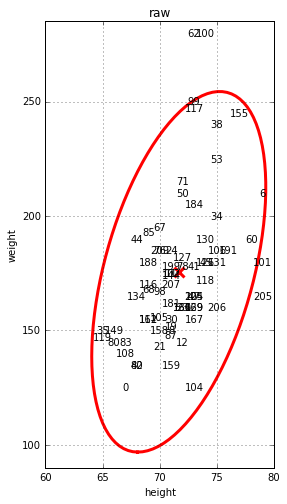

In [6]:
def calculate_2d_gaussian_confidence_region(mu, Sigma, p = 0.95, points = 200):
    """
    Returns a points x 2 numpy.ndarray of the confidence region.
    
    Keyword arguments:
    mu -- mean
    Sigma -- covariance matrix
    p -- percent confidence
    points -- number of points to interpolate
    """
    assert(len(mu) == len(Sigma))
    assert(np.all(Sigma == Sigma.T))
    eigenvalues, S = np.linalg.eig(Sigma)
    S = S[:,eigenvalues.argsort()[::-1]]
    eigenvalues = eigenvalues[eigenvalues.argsort()[::-1]]
    theta = np.linspace(0, 2*np.pi, num = points)
    x = np.sqrt(eigenvalues[0]*stats.chi2.ppf(p, df=2))*np.cos(theta)
    y = np.sqrt(eigenvalues[1]*stats.chi2.ppf(p, df=2))*np.sin(theta)
    return np.dot(S, np.array([x,y])).T + mu
def plot_raw_males(ax=None):
    if ax == None:
        ax = plt.gca()
    gaussian_fit_male = calculate_2d_gaussian_confidence_region(mu_male, covariance_male, p = 0.95, points = 100) 
    ax.axis([60,80,90,285])
    ax.set_title('raw')
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    for row in male_data.itertuples():
        ax.text(row.height, row.weight, row.Index, horizontalalignment='center', verticalalignment='center')
    ax.set_aspect(0.2)
    ax.plot(gaussian_fit_male[:,0], gaussian_fit_male[:,1], linewidth=3, color='red')
    ax.plot(mu_male[0], mu_male[1], 'rx', markersize=10, markeredgewidth=3)    
    ax.grid(True)
plt.figure(figsize=(8,8))
plot_raw_males(plt.gca())
plt.show()

For part (b) says to do the same thing with standardized data.

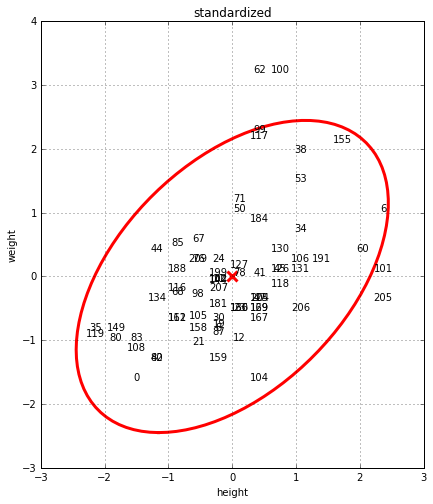

In [7]:
def standardize(x, mean, sd):
    """Standardizes assuming x is normally distributed."""
    return (x - mean)/sd
def plot_standardized_males(ax=None):
    if ax == None:
        ax = plt.gca()
    gaussian_fit_male = calculate_2d_gaussian_confidence_region(mu_male, covariance_male, p = 0.95, points = 100) 
    ax.set_title('standardized')
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    ax.plot(standardize(male_data.height, mu_male[0], np.sqrt(covariance_male[0,0])), 
            standardize(male_data.weight, mu_male[1], np.sqrt(covariance_male[1,1])),
            " ")
    for row in male_data.itertuples():
        ax.text(standardize(row.height, mu_male[0], np.sqrt(covariance_male[0,0])), 
                standardize(row.weight, mu_male[1], np.sqrt(covariance_male[1,1])),
                row.Index, horizontalalignment='center', verticalalignment='center')
    ax.set_aspect('equal')
    ax.plot(standardize(gaussian_fit_male[:,0], mu_male[0], np.sqrt(covariance_male[0,0])), 
            standardize(gaussian_fit_male[:,1], mu_male[1], np.sqrt(covariance_male[1,1])), 
            linewidth=3, color='red')
    ax.plot(0, 0, 'rx', markersize=10, markeredgewidth=3)    
    ax.grid(True)
plt.figure(figsize=(8,8))
plot_standardized_males()
plt.show()

Part (c) deals with *whitening* or *sphereing* the data. This involves transforming the data so that the dimensions are uncorrelated and have equal variances along the axes. Recall that
\begin{equation}
\mathbf{y} = S^\intercal\left(\mathbf{x} - \boldsymbol\mu\right) \sim \mathcal{N}\left(\mathbf{0}, D\right),
\end{equation}
so this transformation accomplishes the tasks of making the dimensions uncorrelated. Now, to make the variances equal simply multiply by $\sqrt{D^{-1}}$, which is easy to compute since $D$ is diagonal and positive definite, so our transformation is
\begin{equation}
\mathbf{y}^\prime = \sqrt{D^{-1}}\mathbf{y} = \sqrt{D^{-1}}S^\intercal\left(\mathbf{x} - \boldsymbol\mu\right)
\sim \mathcal{N}\left(\mathbf{0}, I\right).
\end{equation}
Let's plot this.

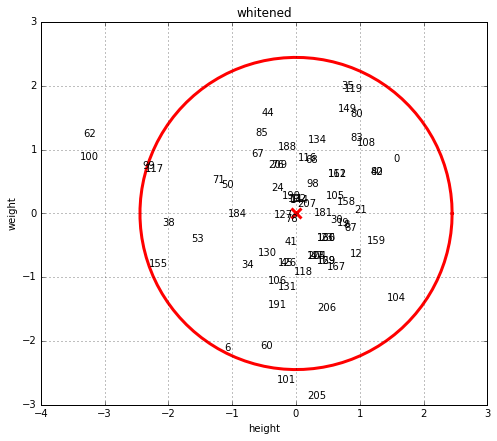

In [8]:
def whiten(X, mu, Sigma):
    assert(len(mu) == len(Sigma))
    assert(np.all(Sigma == Sigma.T))
    eigenvalues, S = np.linalg.eig(Sigma)
    S = S[:,eigenvalues.argsort()[::-1]]
    eigenvalues = eigenvalues[eigenvalues.argsort()[::-1]]    
    inverse_precision = np.diag(1/np.sqrt(eigenvalues))
    return np.dot(np.dot(X - mu, S), inverse_precision)
def plot_whitened_males(ax=None):
    if ax == None:
        ax = plt.gca()
    gaussian_fit_male = calculate_2d_gaussian_confidence_region(mu_male, covariance_male, p = 0.95, points = 100) 
    whitened_gaussian_fit_male = whiten(gaussian_fit_male, mu_male, covariance_male)
    ax.set_title('whitened')
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    whitened_male_data = whiten(np.array([male_data.height, male_data.weight]).T, mu_male, covariance_male)
    ax.plot(whitened_male_data[:,0], whitened_male_data[:,1], " ")
    for i in range(len(whitened_male_data)):
        ax.text(whitened_male_data[i, 0], whitened_male_data[i, 1],                    
                male_data.index[i], horizontalalignment='center', verticalalignment='center')
    ax.set_aspect('equal')
    ax.plot(whitened_gaussian_fit_male[:,0], whitened_gaussian_fit_male[:,1],
            linewidth=3, color='red')
    ax.plot(0, 0, 'rx', markersize=10, markeredgewidth=3)    
    ax.grid(True)
plt.figure(figsize=(8,8))
plot_whitened_males()
plt.show()

Now, we can plot all three figures together just like in the textbook.

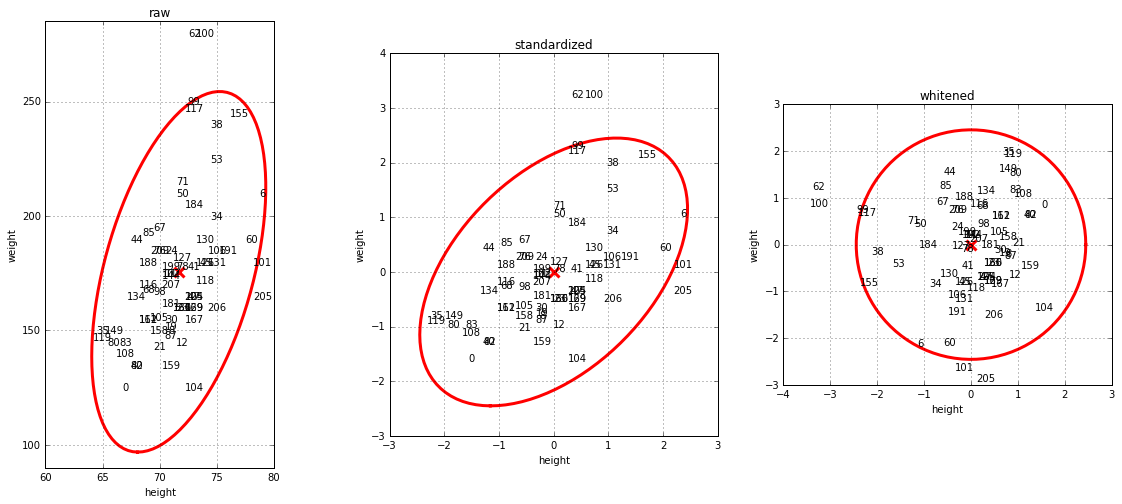

In [9]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
plot_raw_males(ax1)
plot_standardized_males(ax2)
plot_whitened_males(ax3)